In [1]:
import os
import csv

import cv2
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def shuffle(x, y):
    perm = np.arange(len(x))
    np.random.shuffle(perm)
    x = x[perm]
    y = y[perm]

    return (x, y)

def train_test_split(X, Y):
    count = int(len(X)*.7)

    X_train = X[:count]
    Y_train = Y[:count]

    X_val = X[count:]
    Y_val = Y[count:]

    return (X_train, Y_train, X_val, Y_val)


def load_training_and_validation():
    rows, labels = [], []
    with open('data/driving_log.csv', 'r') as _f:
        reader = csv.reader(_f, delimiter=',')
        next(reader, None)
        for row in reader:
            rows.append(row[0].strip())
            labels.append(float(row[3]))
            # left camera
            rows.append(row[1].strip())
            labels.append(float(row[3])+.25)
            # right camera 
            rows.append(row[2].strip())
            labels.append(float(row[3])-0.25)

    assert len(rows) == len(labels), 'unbalanced data'

    # shuffle the data
    X, Y = shuffle(np.array(rows), np.array(labels))

    # split into training and validation
    return train_test_split(X, Y)


In [3]:
X_train, Y_train, X_val, Y_val = load_training_and_validation()

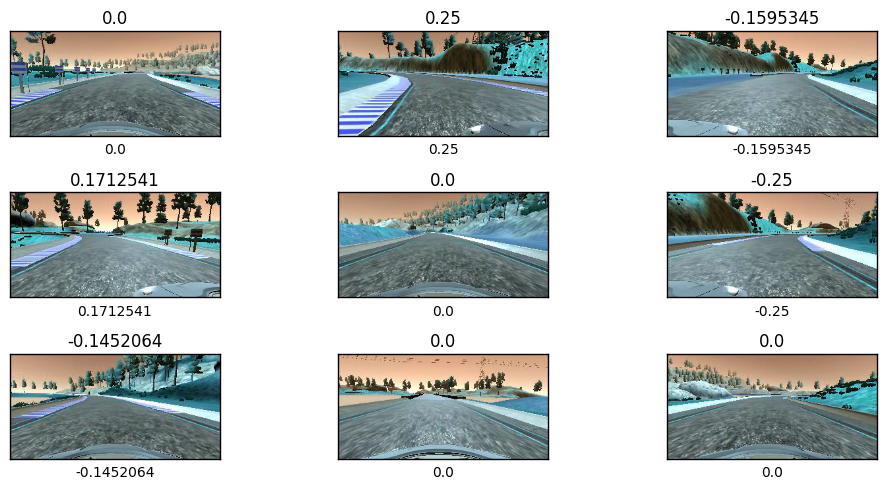

In [4]:
images = np.array([cv2.imread('./data/'+img) for img in X_train[100:109]])
labels = Y_train[100:109]

def plot_axes(axes, images, labels):    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        ax.set_xlabel(labels[i])
        ax.set_title(labels[i])
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

fig, axes = plt.subplots(3, 3, figsize=(10, 5))

fig.subplots_adjust(hspace=1, wspace=1)

plot_axes(axes, images, labels)

plt.tight_layout()

In [8]:
global threashold
global pixels

threashold = 0.05
pixels = 25

def affine_transform(img, angle, right=True):
    global threashold
    global pixels


    cols, rows, ch = img.shape

    pts_a = [75, 75]
    pts_b = [150, 75]
    pts_c = [50, 250]

    pts = [pts_a, pts_b, pts_c]

    pts1 = np.float32(pts)

    if right:
        pts_a = [pts_a[0]+pixels, 75]
        pts_b = [pts_b[0]+pixels, 75]
        pts_c = [pts_c[0]+pixels, 250]
        angle -= (.005 * pixels)
        
    else:
        pts_a = [pts_a[0]-pixels, 75]
        pts_b = [pts_b[0]-pixels, 75]
        pts_c = [pts_c[0]-pixels, 250]
        angle += (.005 * pixels)

    pts2 = np.float32([pts_a, pts_b, pts_c])

    M = cv2.getAffineTransform(pts1, pts2)

    dst = cv2.warpAffine(img, M, (rows, cols))

    return dst.reshape((cols, rows, ch)), angle


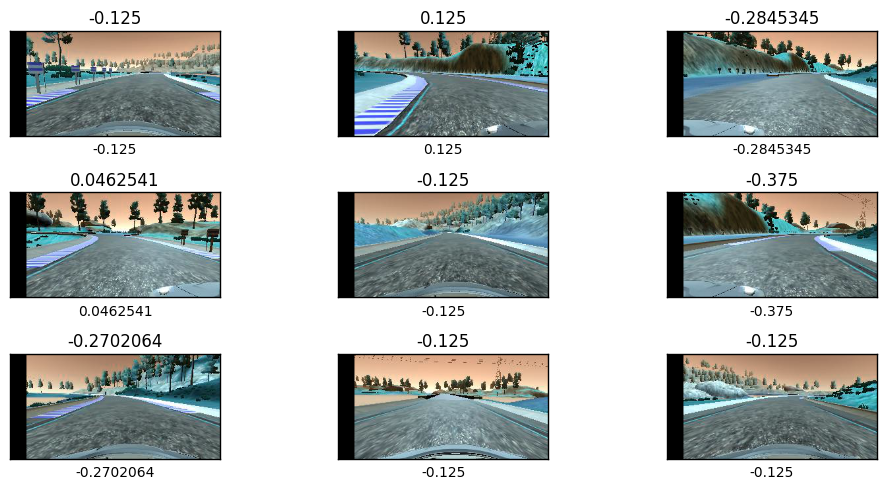

In [9]:
Images = list()
Labels = list()
for i in range(len(images)):
    img, angle = affine_transform(images[i], labels[i])
    Images.append(img)
    Labels.append(angle)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))

fig.subplots_adjust(hspace=1, wspace=1)

plot_axes(axes, Images, Labels)

plt.tight_layout()

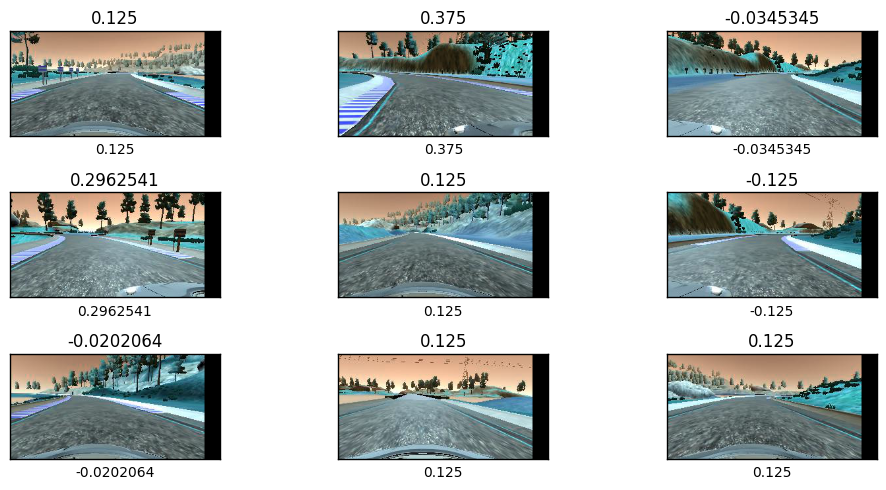

In [10]:
Images = list()
Labels = list()
for i in range(len(images)):
    img, angle = affine_transform(images[i], labels[i], right=False)
    Images.append(img)
    Labels.append(angle)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))

fig.subplots_adjust(hspace=1, wspace=1)

plot_axes(axes, Images, Labels)

plt.tight_layout()